In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
def leastSquaresFit(x,f):
    n = len(x) - 1
    c1 = 0
    c2 = 0
    c3 = 0
    c4 = 0
    for i in range(0,n+1):
        c1 += x[i]
        c2 += x[i]*x[i]
        c3 += f[i]
        c4 += f[i]*x[i]

    g = c1*c1-c2*(n+1)
    a0 = (c1*c4-c2*c3)/g
    a1 = (c1*c3-c4*(n+1))/g

    return a0, a1

30.4


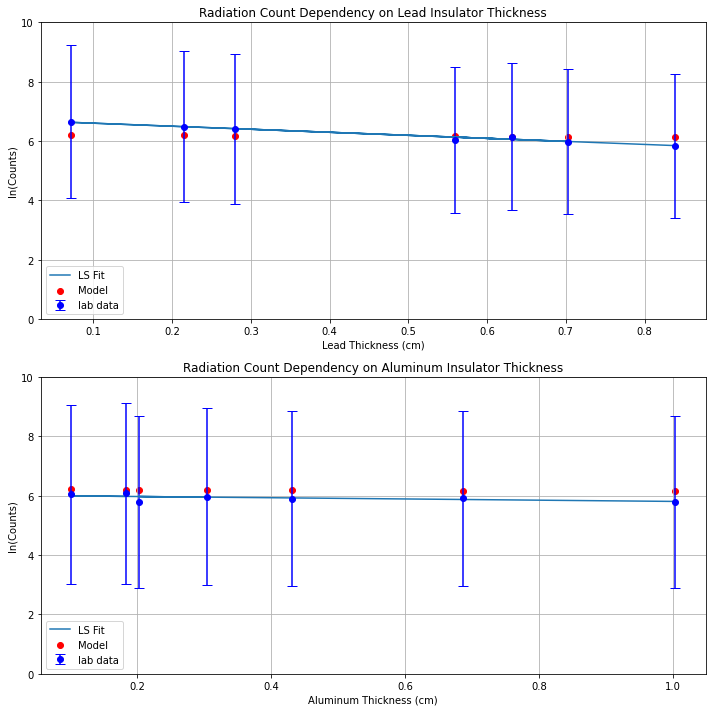

Lead Absorbtion Coefficient (mu): -1.0215204114067635
Aluminum Absorbtion Coefficient (mu): -0.20687540796112922
Lead Absorbtion Coefficient over density (mu/rho): 0.09 | error 20.84%
Aluminum Absorbtion Coefficient over density (mu/rho): 0.07662 | error 75.7%


In [111]:
background_df = pd.read_csv('data/background30s.tsv',delimiter='\t')
cs137_pb_df = pd.read_csv('data/cs-137-Pb.tsv',delimiter='\t')
cs137_al_df = pd.read_csv('data/cs-137-Al.tsv',delimiter='\t')

background = background_df['Counts'].mean()


pb_counts = cs137_pb_df['Counts'] - background
al_counts = cs137_al_df['Counts'] - background
pb_thicknesses = np.array([0.375,0.250,0.314,0.096,0.032,0.282,0.125])*2.54 / 1.135
al_thicknesses = np.array([0.395,0.270,0.170,0.080,0.120,0.040,0.072])*2.54

print(background)
#print(al_counts)
N_0 = 533 - background


fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,10))

# lead
murho_lead = 0.1137
pb_model = (N_0)*np.exp(-murho_lead * pb_thicknesses)
ax1.errorbar(pb_thicknesses,np.log(pb_counts),yerr=np.sqrt(np.log(pb_counts)),fmt='o',capsize=5,c='b',label='lab data')
ax1.scatter(pb_thicknesses,np.log(pb_model),c='red',label='Model')


pb_intercept, pb_slope = leastSquaresFit(pb_thicknesses,np.log(pb_counts))

pb_best_fit =  np.exp(pb_intercept) * np.exp(pb_slope*pb_thicknesses)
ax1.plot(pb_thicknesses,np.log(pb_best_fit),label='LS Fit')

ax1.grid()
ax1.set_ylabel('ln(Counts)')
ax1.set_title('Radiation Count Dependency on Lead Insulator Thickness')
ax1.set_xlabel('Lead Thickness (cm)')

# aluminum


murho_aluminum = 0.0750
al_model = (N_0)*np.exp(-murho_aluminum * al_thicknesses)
ax2.errorbar(al_thicknesses,np.log(al_counts),yerr=np.log(np.sqrt(al_counts)),fmt='o',capsize=5,c='b',label='lab data')
ax2.scatter(al_thicknesses,np.log(al_model),c='red',label='Model')

al_intercept, al_slope = leastSquaresFit(al_thicknesses,np.log(al_counts))

al_best_fit =  np.exp(al_intercept) * np.exp(al_slope*al_thicknesses)
ax2.plot(al_thicknesses,np.log(al_best_fit),label='LS Fit')

ax2.grid()
ax2.set_ylabel('ln(Counts)')
ax2.set_title('Radiation Count Dependency on Aluminum Insulator Thickness')
ax2.set_xlabel('Aluminum Thickness (cm)')

ax2.set_ylim(0,10)
ax1.set_ylim(0,10)


ax1.legend()
ax2.legend()
plt.tight_layout()
plt.show()

print('Lead Absorbtion Coefficient (mu): {}'.format(pb_slope))
print('Aluminum Absorbtion Coefficient (mu): {}'.format(al_slope))
print('==========================================')

print('Lead Absorbtion Coefficient over density (mu/rho): {} | error {}%'.format(round(abs(pb_slope)/11.35,5), round(100*abs((abs(pb_slope)/11.35 - 0.1137)/0.1137),2)))
print('Aluminum Absorbtion Coefficient over density (mu/rho): {} | error {}%'.format(round(abs(al_slope)/2.7,5),round(100*abs((abs(al_slope)/11.35 - 0.0750)/0.0750),2)))




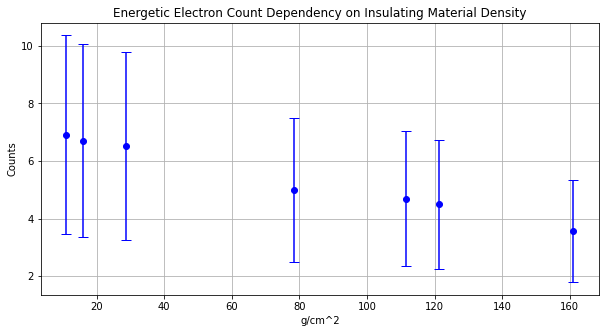

In [131]:
ts_df = pd.read_csv('data/Ts-204-AFslides.tsv',delimiter='\t')
background_df = pd.read_csv('data/background30s.tsv',delimiter='\t')
background = background_df['Counts'].mean()
ts_counts = ts_df['Counts'] - background

ts_thickness = np.array([11,16.1,28.8,78.3,161.1,121.2,111.6])
plt.subplots(figsize=(10,5))
plt.errorbar(ts_thickness,np.log(ts_counts),yerr=np.log(np.sqrt(ts_counts)),fmt='o',capsize=5,c='b',label='lab data')
plt.xlabel('g/cm^2')
plt.ylabel('Counts')
plt.title('Energetic Electron Count Dependency on Insulating Material Density')
plt.grid()

In [ ]:
# 80 - 120 

   Number  Voltage  Counts  Time  time
0       1      900    1965    30     0
1       3      900    1490    30    60
2       5      900    1254    30   120
3       7      900     886    30   180
4       9      900     691    30   240
5      11      900     547    30   300
6      13      900     398    30   360
7      15      900     334    30   420
8      17      900     243    30   480
9      19      900     228    30   540


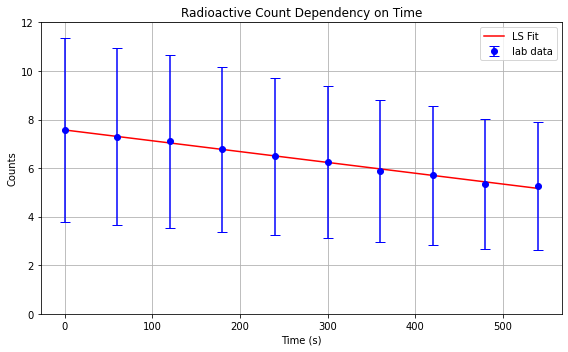

Decay Constant (lambda): 0.004456695427797037
155.52940329659702


In [158]:
plt.subplots(figsize=(8,5))
cow = pd.read_csv('data/cowData.tsv',delimiter='\t')
background_df = pd.read_csv('data/backgroundFull30s.tsv',delimiter='\t')
background_df = background_df.groupby(background_df.index // 2).first()
cow['time'] = cow.index * 30
cow = cow.groupby(cow.index // 2).first()
print(cow)
time_index = cow['time']
counts = cow.Counts - background_df.Counts

plt.errorbar(time_index,np.log(counts),yerr=np.log(np.sqrt(counts)),fmt='o',capsize=5,c='b',label='lab data')

intercept, slope = leastSquaresFit(time_index.to_numpy(),np.log(counts.to_numpy()))

best_fit = intercept +slope*time_index

plt.plot(time_index,best_fit,c='r',label='LS Fit')

plt.ylim(0,12)


plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Counts')
plt.title('Radioactive Count Dependency on Time')
plt.tight_layout()
plt.legend()
plt.show()

print('Decay Constant (lambda): {}'.format(abs(slope)))


print(-np.log(0.5)/abs(slope))
